In [43]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

In [56]:
sim = rebound.Simulation()

sim.add("Sun")
sim.add("Jupiter")
sim.add("Mars")
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .1
simtime = 50

starting_a_list = []
late_as_list = []
final_a_list = []

starting_e_list = []
final_e_list = []

rings = 200
as_per_ring = 20

for i in range (rings):

    clear_output(wait=True)
    print(i/rings)

    for j in range (as_per_ring):
    
        # create astroid
        mass = 1e-29
        radius = 2.402+(0.001*i)
        
        # res on 2.502

        # verdelen over ring met vers. ecc
        omega =(2*np.pi)/as_per_ring*j
        ecc = 0.2*random.random()

        # add astroid
        sim.add(m=mass,a=radius,omega=omega, e=ecc)
        starting_a_list.append(radius)
        starting_e_list.append(ecc)

        sim.steps(int(simtime*(1/sim.dt)))
        # for years in np.arange(simtime*(1/sim.dt)):

        #     sim.steps()

        #     if years > 0.98*(simtime*(1/sim.dt)):
        #         late_as_list.append(sim.particles[2].a)

        
        final_a_list.append(sim.particles[2].a)
        final_e_list.append(sim.particles[2].e)
        sim.remove(2)

        with open('opslag.csv', 'a') as f:
            
            # using csv.writer method from CSV package
            write = csv.writer(f)
            write.writerow([radius, sim.particles[2].a, ecc, sim.particles[2].e, rings*as_per_ring, simtime])
        #write.writerows([final_a_list])



0.995


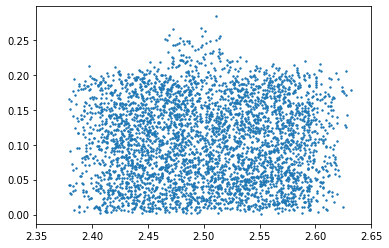

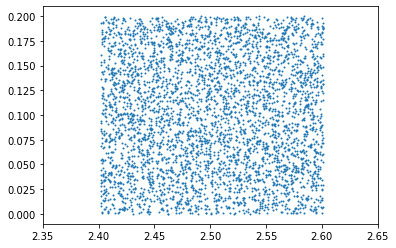

In [49]:
plt.scatter(final_a_list, final_e_list, s=1)
plt.xlim(2.35, 2.65)
plt.figure()
plt.scatter(starting_a_list, starting_e_list, s=1)
plt.xlim(2.35, 2.65)

plt.show()

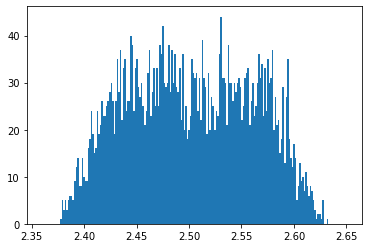

In [48]:
plt.hist(final_a_list,bins=200,range=(2.36,2.65))
plt.show()